In [1]:
import numpy as np
import matplotlib.pyplot as plt

# What does first order kinetic mean?

In this notebook I am going to talk about the possible statistical descriptions of the first order kinetincs.

System with first order kinetic has the following ODE for population

$$ \dfrac{dN}{dt} = a N$$

Can we make a statistical model that can acount for this kind models?

I think there are two way that you can describe a system with first order kinetinc based on its microscopic behaviour.


## 1. People and Calling them from List!

In this model, at each time step I read the number of one person (from my list of people whitch contains the numbers from 1 --> n).

The person who I called his name can cross the river with probability p (from A to B) and can go from B to A with probability B

In [219]:
def runEns1(Ens):
    steps = 10000
    N_aList_final = np.zeros(steps)
    N_bList_final = np.zeros(steps)
    tList = np.arange(steps)
    
    for ens in range(Ens): 
        
        N_tot = 500
        N_a = np.random.randint(N_tot)*0 + N_tot
        N_b = N_tot - N_a
        p = 0.8
        q = 0.4
        N_aList = np.zeros(steps)
        N_bList = np.zeros(steps)


        for i in range(steps):

            N_aList[i] = N_a
            N_bList[i] = N_b

            island_selection_rand = np.random.random()
            islandA_prob = N_a/N_tot

            if island_selection_rand < islandA_prob:
                moveRand = np.random.random()
                if moveRand <= p:
                    if N_a == 0:
                        continue
                    N_a -= 1
                    N_b += 1
            else:
                moveRand = np.random.random()
                if moveRand <= q:
                    if N_b == 0:
                        continue
                    N_a += 1
                    N_b -= 1
                    
        N_aList_final += N_aList/Ens
        N_bList_final += N_bList/Ens
            
            
    return N_aList_final, N_bList_final, tList
    


In [220]:
N_aList, N_bList, tList = runEns1(100)
total = N_aList + N_bList


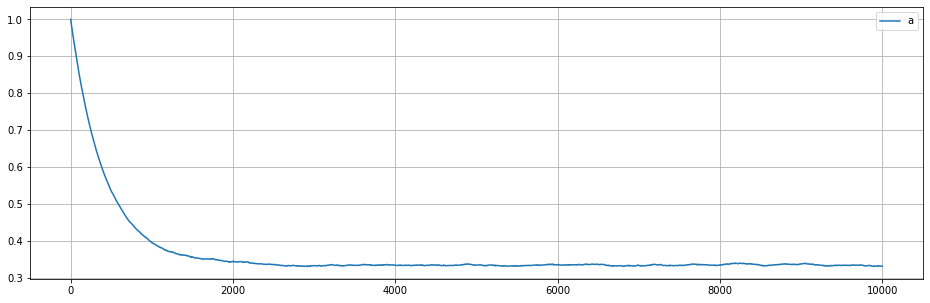

In [221]:
plt.figure(figsize=(16,5))
#plt.plot(np.log(tList), N_aList, label="a")
plt.plot(tList, N_aList/total, label="a")
#plt.plot(N_bList, label="b")
plt.grid()
plt.legend()

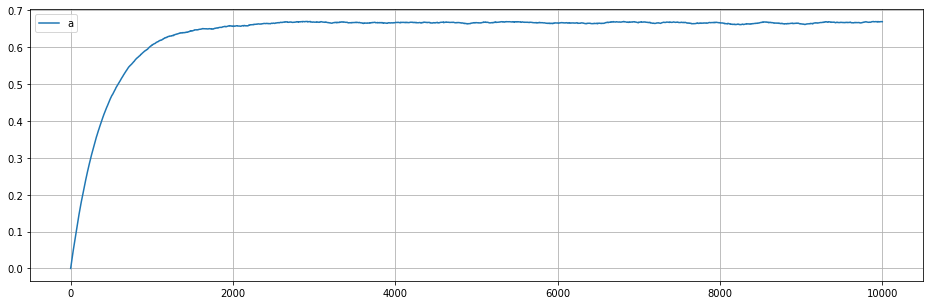

In [222]:
plt.figure(figsize=(16,5))
#plt.plot(np.log(tList), N_aList, label="a")
plt.plot(tList, N_bList/total, label="a")
#plt.plot(N_bList, label="b")
plt.grid()
plt.legend()

### Important note:

Note that if you plot the following function in a y_log plot,

$$ y = ae^x + b $$

The result will not be a linear function!!

See the following example.

That is the reason you can not see a linear function in y_log plot of the above example if you set the value of q to a non zeros value (that will produce a non zeros "bias" in the function of population of island a

In [208]:
def f(x):
    return 50*np.exp(-x)+150

In [209]:
xList = np.arange(0,10,0.01)

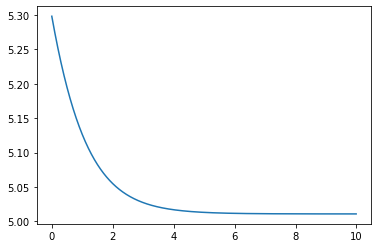

In [210]:
plt.plot(xList, np.log(f(xList)))

## Poeple that are tossing coins!

At each time step, we toss a coin (generate a random number) for each person. if that number is lower than p (or q) then that person can go from island A to island B (go from island B to island A) (implementation)

Description => at each time step people from islan A can cross the river and go to island B with probability p (and the other way around with probability q)

As you can see this model converges super super fast to the final values

In [227]:
def runEns2(Ens):
    step = 50
    N_aList_final = np.zeros(step)
    N_bList_final = np.zeros(step)
    
    for ens in range(Ens):
        N_total = 50000
        N_a = int(N_total/2)
        N_b = int(N_total/2)

        N_a_aux = N_a
        N_b_aux = N_b

        p = 0.8
        q = 0.4


        N_aList = np.zeros(step)
        N_bList = np.zeros(step)

        for i in range(step):

            N_aList[i] = N_a
            N_bList[i] = N_b

            rand = np.random.random(N_a)
            passed = (rand < p).sum()
            N_a_aux -= passed
            N_b_aux += passed

            rand = np.random.random(N_b)
            passed = (rand < q).sum()
            N_b_aux -= passed
            N_a_aux += passed

            N_a = N_a_aux
            N_b = N_b_aux
            
        N_aList_final += N_aList/Ens
        N_bList_final += N_bList/Ens
    
    return N_aList_final, N_bList_final
    
    

In [228]:
N_aList, N_bList = runEns2(100)
total = N_aList + N_bList

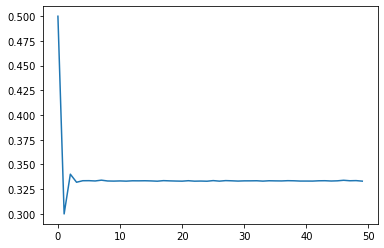

In [229]:
plt.plot(N_aList/total)

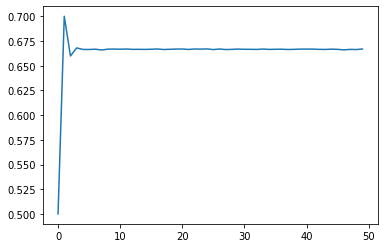

In [230]:
plt.plot(N_bList/total)

## Conclusion

As you can see the second model converges very very fast to the final value (this can be useful when we are interested in the final values of the system). But when we want to study the trasient behaviour of system, then this model is not good because it coverbes very fast to the final value.

We can also implement an intermediate approach (at each time step only a fraction of people from each island got the chance to toss a coin and cross the river). This will produce intermediate results (will not converge that fast and also will not have that much full transient behaviour)



## Implementing the third method

In [304]:
def runEns3(Ens):
    steps =  800
    N_aList_final = np.zeros(steps)
    N_bList_final = np.zeros(steps)
    tList = np.arange(steps)
    ratio = 0.01
    
    for ens in range(Ens): 
        
        N_tot = 5000
        N_a = np.random.randint(N_tot)*0 + N_tot
        N_b = N_tot - N_a
        p = 0.8
        q = 0.4
        N_aList = np.zeros(steps)
        N_bList = np.zeros(steps)


        for i in range(steps ):

            N_aList[i] = N_a
            N_bList[i] = N_b

            island_selection_rand = np.random.random()
            islandA_prob = N_a/N_tot

            for person in range(int(ratio*N_a)):
                moveRand = np.random.random()
                if moveRand <= p:
                    if N_a == 0:
                        continue
                    N_a -= 1
                    N_b += 1
                    
            for person in range(int(ratio*N_b)):
                moveRand = np.random.random()
                if moveRand <= q:
                    if N_b == 0:
                        continue
                    N_a += 1
                    N_b -= 1
                    
        N_aList_final += N_aList/Ens
        N_bList_final += N_bList/Ens
            
            
    return N_aList_final, N_bList_final, tList
    


In [305]:
N_aList, N_bList, tList = runEns3(100)
total = N_aList + N_bList


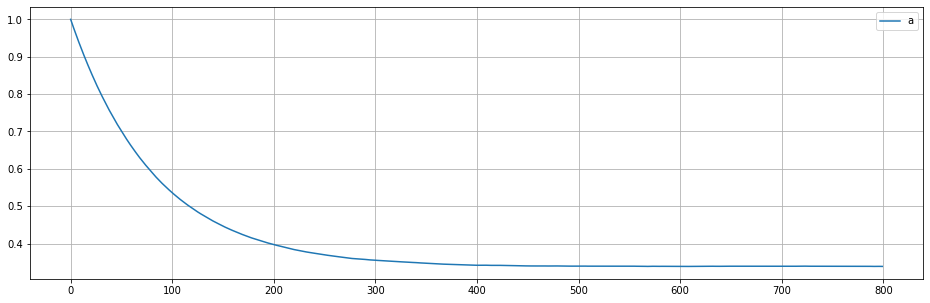

In [306]:
plt.figure(figsize=(16,5))
#plt.plot(np.log(tList), N_aList, label="a")
plt.plot(tList, N_aList/total, label="a")
#plt.plot(N_bList, label="b")
plt.grid()
plt.legend()

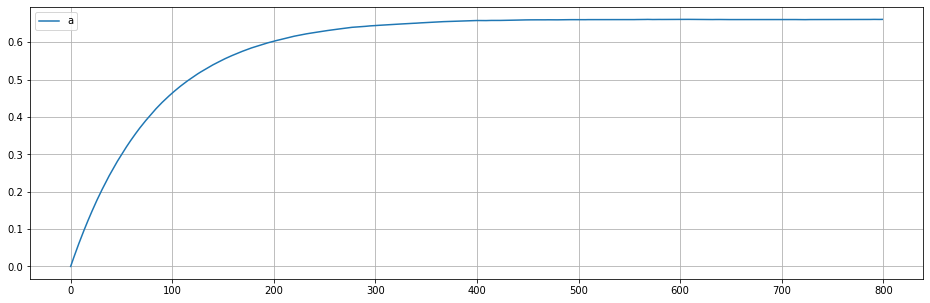

In [307]:
plt.figure(figsize=(16,5))
#plt.plot(np.log(tList), N_aList, label="a")
plt.plot(tList, N_bList/total, label="a")
#plt.plot(N_bList, label="b")
plt.grid()
plt.legend()